# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 2. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`** и html-версии графиков (подробности в условии).
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [ ]:
# Bot check

# HW_ID: fpmi_ad2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.graph_objects as go
import plotly.express as px

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="https://www.yelp.com/">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

![Yelp_Logo_No_Outline_Color.jpg](attachment:Yelp_Logo_No_Outline_Color.jpg)

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>, но использовать нужно выданные данные.

_____________

**Что нужно сделать:**

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.


*Далее в условии встречаются различные подсказки, как можно выполнить определенные части задачи. Вы можете их игнорировать и делать иным способом для получения **того же самого промежуточного результата**. Однако, если ваше решение окажется **значительно** менее эффективным (по скорости, количеству и красоте кода) по сравнению с предполагаемым, баллы могут быть снижены.*

------

#### 1. Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [ ]:
data = pd.read_csv("yelp_business.csv")
data.head()

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.


In [ ]:
companies_in_city = data.groupby("city").count()["business_id"]
companies_in_city = companies_in_city.sort_values(ascending=False)
companies_in_city.head()

city
Las Vegas     26775
Phoenix       17213
Toronto       17206
Charlotte      8553
Scottsdale     8228
Name: business_id, dtype: int64

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

In [ ]:
data = data[data["city"] == "Las Vegas"]
data.head()

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
6,6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,1,Real Estate Services;Real Estate;Home Services...
7,7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1,Shopping;Sporting Goods
26,26,VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",Southeast,"""5775 S Eastern, Ste 103""",Las Vegas,NV,89119,36.085051,-115.119421,1,Shopping;Jewelry;Watch Repair;Local Services
41,41,1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",Spring Valley,"""7260 Cimarron Rd, Ste 130""",Las Vegas,NV,89113,36.056382,-115.269332,1,Home Services;Lighting Fixtures & Equipment;Lo...
48,48,DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",NaN,"""5340 Boulder Hwy""",Las Vegas,NV,89122,36.105196,-115.056880,1,Nurseries & Gardening;Home & Garden;Shopping


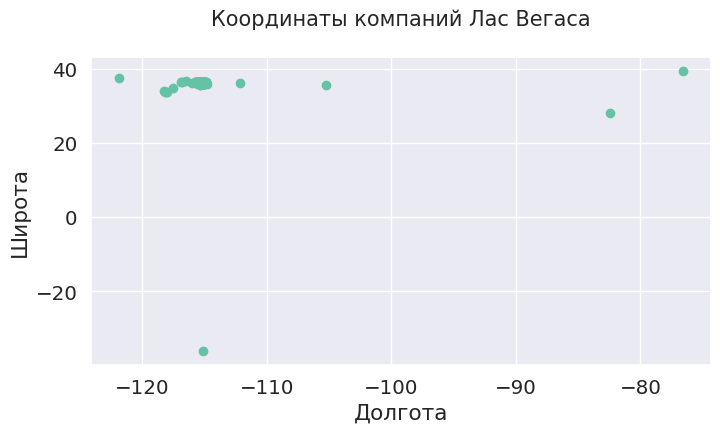

In [ ]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(8, 4))
    plt.scatter(x=data["longitude"], y=data["latitude"])
    plt.title(
        "Координаты компаний Лас Вегаса\n",
        fontsize=15,
    )
    plt.xlabel("Долгота")
    plt.ylabel("Широта")

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы.

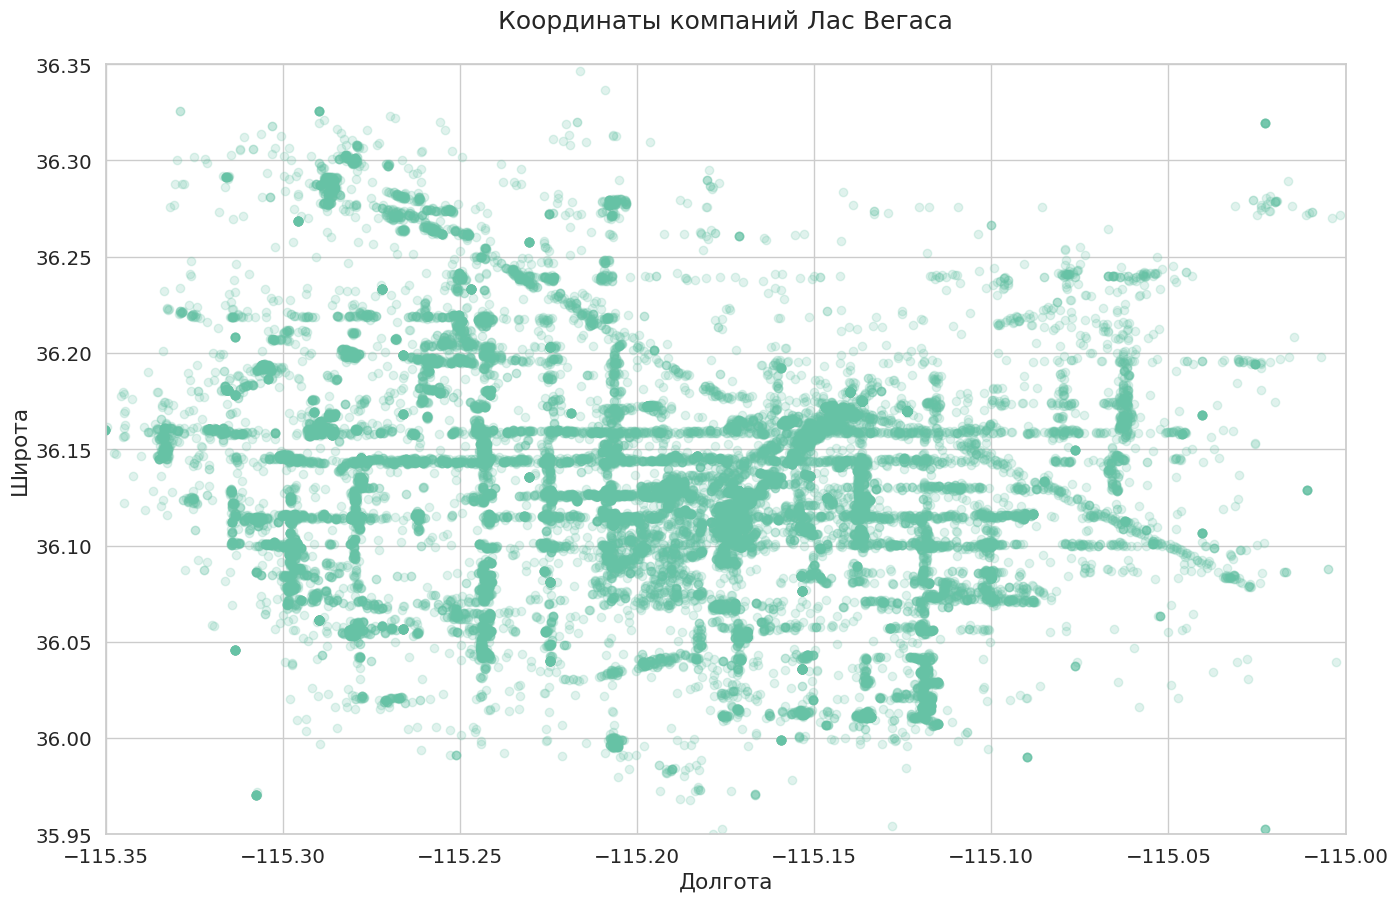

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(16, 10))
    plt.scatter(data["longitude"], data["latitude"], alpha=0.2)
    plt.ylim([35.95, 36.35])
    plt.xlim([-115.35, -115])

    plt.title("Координаты компаний Лас Вегаса\n", fontsize=18)
    plt.xlabel("Долгота")
    plt.ylabel("Широта")

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб, и его не получится отправить боту. В любом случае **<u>необходимо сохранить карту в html и отправить ее отдельным файлом в бот.</u>** При этом каждый файл html должен не превышать 20 Мб, присылать файлы в архиве нельзя. Аналогично со всеми следующими интерактивными графиками в этом задании.

In [ ]:
figure = px.density_mapbox(
    data[
        (data["city"] == "Las Vegas")
        & (data["longitude"] >= -115.35)
        & (data["longitude"] <= -115)
        & (data["latitude"] >= 35.95)
        & (data["latitude"] <= 36.35)
    ],
    lat="latitude",
    lon="longitude",
    radius=4,
    center={"lat": 36.17, "lon": -115.14},
    zoom=10,
    mapbox_style="open-street-map",
)

plotly.offline.plot(figure, filename="map_test.html")

'map_test.html'

Если все получилось, вы молодцы! Далее в этой задаче тоже стройте интерактивные карты. Если нет желания разбираться с интерактивными графиками, можно построить статичные, но баллы будут снижены.

#### 2. Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [ ]:
review = pd.read_csv("yelp_review.csv")
review

,Unnamed: 0,business_id,stars
0,0,AEx2SYEUJmTxVVB18LlCwA,5
1,1,VR6GpWIda3SfvPC-lg9H3w,5
2,2,CKC0-MOWMqoeWf6s-szl8g,5
3,3,ACFtxLv8pGrrxMm6EgjreA,4
4,4,s2I_Ni76bjJNK9yG60iD-Q,4
...,...,...,...
5261663,5261663,Ngk84Ax1tXgpoJFEGxot3w,1
5261664,5261664,pOEL97ld-FJMKO8Ki8JmYg,3
5261665,5261665,5ubokMNw8qfbX2WtxgJG1Q,4
5261666,5261666,EO3i5kTUG7_S2OIQ23sdSA,3


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`.

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [ ]:
lv_review = review.set_index("business_id").loc[data["business_id"]].reset_index()
lv_review

,business_id,Unnamed: 0,stars
0,kCoE3jvEtg6UVz5SOD3GVw,456053,4
1,kCoE3jvEtg6UVz5SOD3GVw,1093900,1
2,kCoE3jvEtg6UVz5SOD3GVw,2039047,5
3,kCoE3jvEtg6UVz5SOD3GVw,2979380,5
4,kCoE3jvEtg6UVz5SOD3GVw,4844650,5
...,...,...,...
1604222,9ouC6BpmjFpLfHeQnLQqng,4857506,5
1604223,9ouC6BpmjFpLfHeQnLQqng,5256464,5
1604224,n9a-3YhibkMDUEgncIivHg,779637,5
1604225,n9a-3YhibkMDUEgncIivHg,1222296,1


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок.

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [ ]:
companies_review = lv_review.groupby("business_id")["stars"].aggregate(["mean", "size"])
companies_review

,mean,size
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19
...,...,...
zzOo9n22fBbKAhbSpMzggA,3.230769,26
zzXuJF6UUT1kgTyCsmgDmQ,5.000000,4
zzjqFOujmM9surbMANZ_ag,5.000000,3


Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [ ]:
companies_review.columns = ["rating", "number"]
companies_review

,rating,number
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19
...,...,...
zzOo9n22fBbKAhbSpMzggA,3.230769,26
zzXuJF6UUT1kgTyCsmgDmQ,5.000000,4
zzjqFOujmM9surbMANZ_ag,5.000000,3


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, а также две колонки со средней оценкой компаний и количеством оценок, которые вы посчитали выше.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [ ]:
data = companies_review.join(data.set_index("business_id")).drop(
    [
        "Unnamed: 0",
        "neighborhood",
        "address",
        "city",
        "state",
        "postal_code",
        "is_open",
    ],
    axis=1,
)
data

,rating,number,name,latitude,longitude,categories
business_id,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451,"""Delmonico Steakhouse""",36.123183,-115.169190,Cajun/Creole;Steakhouses;Restaurants
--DdmeR16TRb3LsjG0ejrQ,3.200000,5,"""World Food Championships""",36.114277,-115.170975,Arts & Entertainment;Festivals
--WsruI0IGEoeRmkErU5Gg,4.928571,14,"""Dial Carpet Cleaning""",36.130899,-115.190785,Carpet Cleaning;Local Services
--Y7NhBKzLTbNliMUX_wfg,4.875000,8,"""Pinnacle Restoration""",36.061235,-115.289685,Drywall Installation & Repair;Handyman;Home Se...
--e8PjCNhEz32pprnPhCwQ,3.473684,19,"""Lucky's Pet Grooming & Boutique""",36.158851,-115.133272,Pets;Pet Groomers;Pet Services;Pet Stores
...,...,...,...,...,...,...
zzOo9n22fBbKAhbSpMzggA,3.230769,26,"""Goodtimes Bar & Nightclub""",36.099328,-115.128494,Dance Clubs;Gay Bars;Nightlife;Bars
zzXuJF6UUT1kgTyCsmgDmQ,5.000000,4,"""Sin City Spray Tans""",36.055602,-115.118218,Spray Tanning;Beauty & Spas;Tanning
zzjqFOujmM9surbMANZ_ag,5.000000,3,"""American Express Open Business Lounge""",36.129838,-115.146037,Nightlife;Lounges;Bars


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$. Если у одной компании несколько филиалов с разными адресами, наносите на график все адреса.

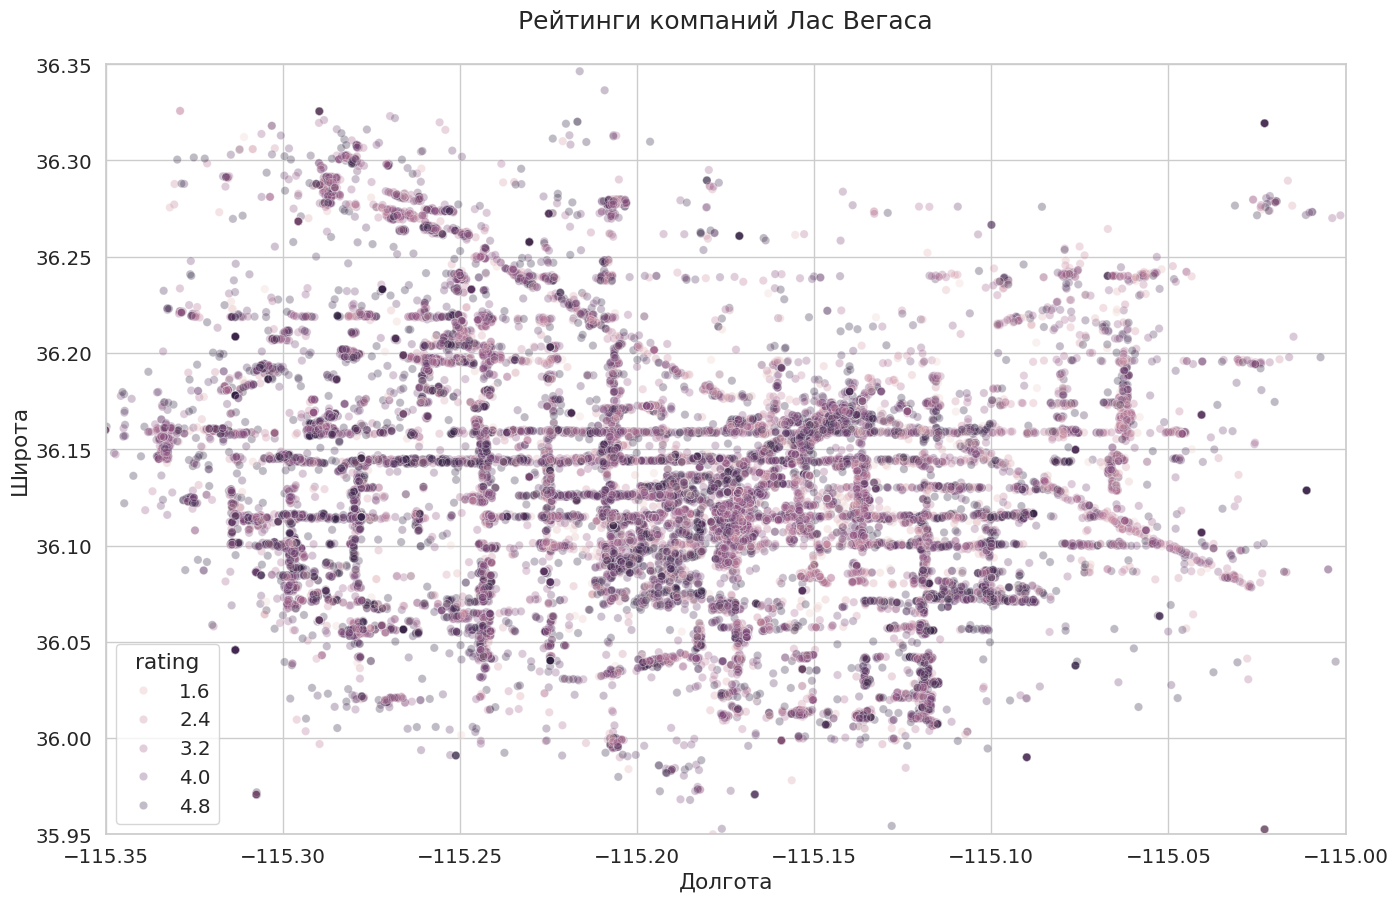

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(16, 10))
    sns.scatterplot(data=data, x="longitude", y="latitude", alpha=0.3, hue="rating")
    plt.ylim([35.95, 36.35])
    plt.xlim([-115.35, -115])

    plt.title("Рейтинги компаний Лас Вегаса\n", fontsize=18)
    plt.xlabel("Долгота")
    plt.ylabel("Широта")

Построим тот же график в интерактивном виде и cохраним в файл map_ratings.html:

In [ ]:
figure = px.density_mapbox(
    data[
        (data["longitude"] >= -115.35)
        & (data["longitude"] <= -115)
        & (data["latitude"] >= 35.95)
        & (data["latitude"] <= 36.35)
    ],
    z="rating",
    lat="latitude",
    lon="longitude",
    radius=5,
    center={"lat": 36.17, "lon": -115.14},
    zoom=10,
    opacity=0.3,
    mapbox_style="open-street-map",
)

plotly.offline.plot(figure, filename="map_ratings.html", auto_open=False)

'map_ratings.html'

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района.

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [ ]:
data["longitude"] = data["longitude"].apply(
    lambda x: np.round(x * 4, decimals=1) * 0.25
)
data["latitude"] = data["latitude"].apply(lambda x: np.round(x * 4, decimals=1) * 0.25)
data

,rating,number,name,latitude,longitude,categories
business_id,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451,"""Delmonico Steakhouse""",36.125,-115.175,Cajun/Creole;Steakhouses;Restaurants
--DdmeR16TRb3LsjG0ejrQ,3.200000,5,"""World Food Championships""",36.125,-115.175,Arts & Entertainment;Festivals
--WsruI0IGEoeRmkErU5Gg,4.928571,14,"""Dial Carpet Cleaning""",36.125,-115.200,Carpet Cleaning;Local Services
--Y7NhBKzLTbNliMUX_wfg,4.875000,8,"""Pinnacle Restoration""",36.050,-115.300,Drywall Installation & Repair;Handyman;Home Se...
--e8PjCNhEz32pprnPhCwQ,3.473684,19,"""Lucky's Pet Grooming & Boutique""",36.150,-115.125,Pets;Pet Groomers;Pet Services;Pet Stores
...,...,...,...,...,...,...
zzOo9n22fBbKAhbSpMzggA,3.230769,26,"""Goodtimes Bar & Nightclub""",36.100,-115.125,Dance Clubs;Gay Bars;Nightlife;Bars
zzXuJF6UUT1kgTyCsmgDmQ,5.000000,4,"""Sin City Spray Tans""",36.050,-115.125,Spray Tanning;Beauty & Spas;Tanning
zzjqFOujmM9surbMANZ_ag,5.000000,3,"""American Express Open Business Lounge""",36.125,-115.150,Nightlife;Lounges;Bars


Для получения средней оценки компаний по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

*Замечание.* В качестве среднего можно было бы посчитать как общее среднее по всем оценкам всех компаний, так и среднее по компаниям их средних оценок. В чем разница этих подходов? Какой из них необходимо использовать в данном случае?

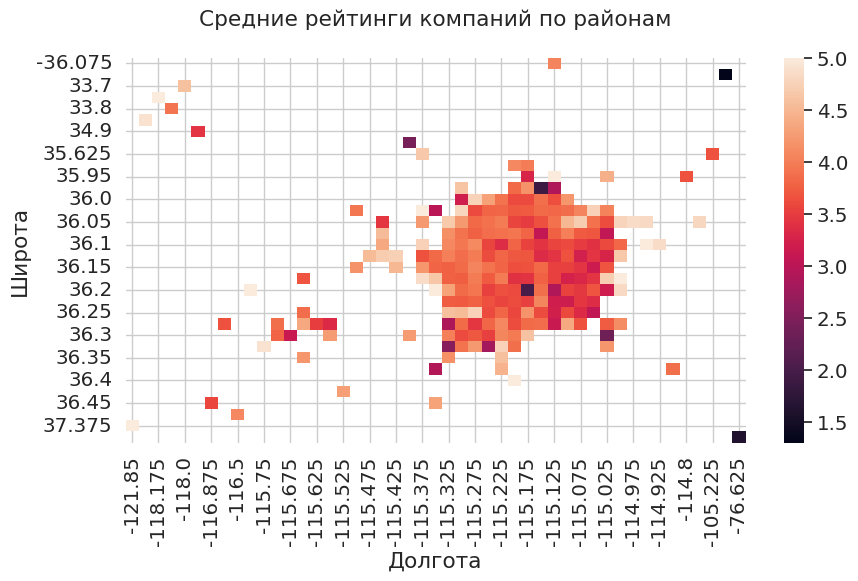

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 5))
    sns.heatmap(
        pd.pivot_table(data, index="latitude", columns="longitude", values="rating")
    )
    plt.title("Средние рейтинги компаний по районам\n")
    plt.xlabel("Долгота")
    plt.ylabel("Широта")

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:**
1. Имея средний рейтинг компаний в данном районе, мы можем предсказать рейтинг компании, котороя откроется в будущем. Если же компанй в районе мало, например, одна, то ее рейтинг не позволяет предсказать рейтинг будущих компаний (может, это выборос).
2. График из-за этого может потерять информативность в случае, если распределение рейтингов сосредточено преимущественно на каком-то небольшом подотрезке отрезка $[1, 5]$, но при этом имеется небольшое количество компаний с рейтингом  вне этого подотрезка. Например, почти все копании имеют рейтинг 4 или 5, и несколько имеют рейтнг 1.

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [ ]:
comp_in_region = data.reset_index().groupby(["latitude", "longitude"]).count()
comp_in_region = comp_in_region[comp_in_region.business_id >= 30]
comp_in_region

more_inf_data = (
    data.set_index(["latitude", "longitude"]).loc[comp_in_region.index].reset_index()
)
more_inf_data

,latitude,longitude,rating,number,name,categories
0,36.0,-115.200,3.400000,5,"""Epic Storage""",Self Storage;Local Services
1,36.0,-115.200,4.307692,26,"""Purple Penguin Snowcone Shack""",Desserts;Food;Shaved Ice;Food Trucks
2,36.0,-115.200,2.500000,4,"""Hot Dog Heaven""",Hot Dogs;Restaurants
3,36.0,-115.200,4.000000,17,"""Vision Source!""",Shopping;Eyewear & Opticians;Health & Medical;...
4,36.0,-115.200,4.188540,541,"""Spaghetty Western""",Restaurants;Bars;Nightlife;Italian;Delis
...,...,...,...,...,...,...
25914,36.3,-115.275,4.285714,28,"""Miracle Dental""",Dentists;Health & Medical;General Dentistry
25915,36.3,-115.275,3.333333,12,"""Somerset Academy Sky Pointe Campus""",Elementary Schools;Education;Middle Schools & ...
25916,36.3,-115.275,4.200000,10,"""A1 PET Waste Maintenance""",Pets;Pet Services
25917,36.3,-115.275,3.222222,18,"""Dollar Tree Store""",Discount Store;Shopping


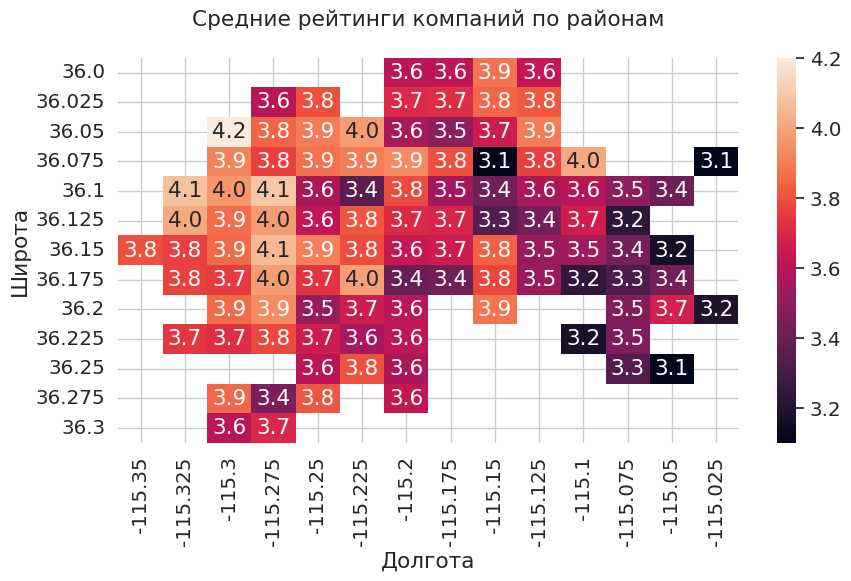

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 5))
    sns.heatmap(
        pd.pivot_table(
            more_inf_data, index="latitude", columns="longitude", values="rating"
        ),
        vmin=3.1,
        vmax=4.2,
        fmt=".1f",
        annot=True,
    )
    plt.title("Средние рейтинги компаний по районам\n")
    plt.xlabel("Долгота")
    plt.ylabel("Широта")

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:**
Мы учли недостатки первого графика и построили более информативный график, отражающий реальные показатели средних оценок компаний по районам. Сравним два метода подсчета средних и поймем, какой стоит использовать.
1. Преимущество второго способа состоит в том, что мы не оцениваем районы с малым числом заведений, так как они априори не будут информативны по указанным выше причинам. Помимо этого, мы убрали граничные оценки, так как они тоже редко бывают правидивы и их можно рассматривать как выбросы.
2. Однако есть и недостатки у второго способа по сравнению с первым. Например, если все районы имеют рейтинг от 3.8 до 4.2, то они все достаточно хорошие, и нельзя районы с рейтингом 4.0 окрашивать в "плохой" цвет. Более того, если все районы имеют рейтинг от 4.2 до 5, то heatmap и вовсе окажется пустым.
3. Но здравый смысл говорит, что обе ситуяции, показанные в пункте 2, можно сказать, нереальны, ведь оценки компаний имеют распределение, близкое к нормальному с матожиданием ближе к середине отрезка [1, 5] (по крайней мере, при том колиичестве оценок, которое мы рассматриваем). А это значит, что использование второго способа в данном случае разумнее.
4. Что же касается выбора vmin и vmax, то их я выбрал, посмотрев на первый heatmap. Из него видно, что там всего 2-4 района с более низким рейтингом, чем наша нижняя граница или более высоким, чем верхнаяя. Стоит сказать, что выбор не слишком большого интервала важен для более контрастной цветовой гаммы, которая делает график визуально более доступным.

#### 3. Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [ ]:
restaurants = data.copy()
restaurants = restaurants[
    restaurants["categories"].apply(lambda x: "restaurant" in x.lower())
]
restaurants = restaurants[restaurants["number"] > 4]
restaurants

,rating,number,name,latitude,longitude,categories
business_id,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451,"""Delmonico Steakhouse""",36.125,-115.175,Cajun/Creole;Steakhouses;Restaurants
--q7kSBRb0vWC8lSkXFByA,4.000000,7,"""Double Play Sports Bar""",36.025,-115.175,Sports Bars;Pizza;Restaurants;Nightlife;Bars
-153AjTW5luZPK4omEujWA,3.000000,5,"""Jody Maroni's Sausage Kingdom""",36.100,-115.175,Hot Dogs;Restaurants
-1m9o3vGRA8IBPNvNqKLmA,4.736842,38,"""Bavette's Steakhouse & Bar""",36.100,-115.175,African;Restaurants;Nightlife;Bars;Steakhouses...
-1vfRrlnNnNJ5boOVghMPA,3.226667,75,"""Red Ginseng Narita Sushi & BBQ""",36.275,-115.275,Sushi Bars;Korean;Restaurants
...,...,...,...,...,...,...
zuwba6QEBIDZT0tJZmNhdQ,3.260664,211,"""Kobe Sushi Bar""",36.125,-115.300,Sushi Bars;Japanese;Restaurants;Tapas Bars
zwNC-Ow4eIMan2__bS9-rg,4.152642,511,"""Taco Y Taco""",36.100,-115.100,Vegetarian;Restaurants;Mexican
zwddv6HjTjDx9fOr3MFtwQ,2.428571,28,"""Quesadilla""",36.125,-115.175,Restaurants;Mexican


In [ ]:
rests_in_region = restaurants.groupby(["latitude", "longitude"]).count()
rests_in_region = rests_in_region[rests_in_region.name > 9]

more_inf_rests = restaurants.copy()
more_inf_rests = (
    more_inf_rests.set_index(["latitude", "longitude"])
    .loc[rests_in_region.index]
    .reset_index()
)
more_inf_rests

,latitude,longitude,rating,number,name,categories
0,36.0,-115.200,4.188540,541,"""Spaghetty Western""",Restaurants;Bars;Nightlife;Italian;Delis
1,36.0,-115.200,2.333333,9,"""Aloha A Go Go""",Restaurants;Hawaiian
2,36.0,-115.200,3.377358,106,"""Xtreme Sushi""",Restaurants;Japanese;Sushi Bars
3,36.0,-115.200,3.169811,106,"""The Lodge Cactus""",Beer;Wine & Spirits;Food;American (Traditional...
4,36.0,-115.200,2.280000,25,"""Dairy Queen""",Fast Food;Restaurants;Food;Desserts;Sandwiches...
...,...,...,...,...,...,...
5331,36.3,-115.275,4.000000,7,"""Mom's Good Eats""",Sandwiches;Chicken Wings;Restaurants
5332,36.3,-115.275,2.115385,52,"""McDonald's""",Burgers;Restaurants;Fast Food
5333,36.3,-115.275,3.125000,24,"""Lucky's Lounge""",Restaurants;Sports Bars;Bars;Lounges;Nightlife
5334,36.3,-115.275,3.250000,76,"""Table 89""",Salad;Sandwiches;Restaurants;American (New);Pizza


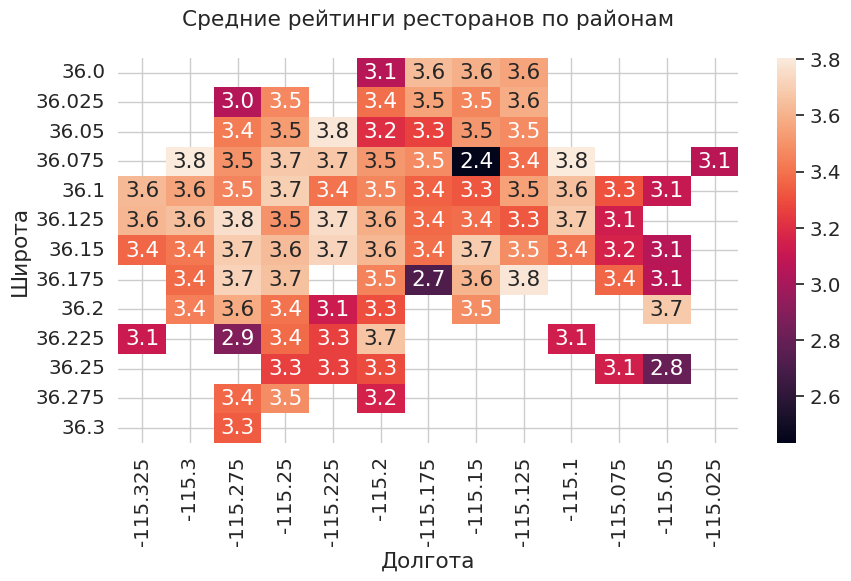

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 5))
    sns.heatmap(
        pd.pivot_table(
            more_inf_rests, index="latitude", columns="longitude", values="rating"
        ),
        fmt=".1f",
        annot=True,
    )

    plt.title("Средние рейтинги ресторанов по районам\n")
    plt.xlabel("Долгота")
    plt.ylabel("Широта")

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:**
Как и всегда, чем больше данных, тем лучше. По малому качеству отзывов сложно сделать правильный вывод о ресторане.
Аналогично с количеством ресторанов в районе. Если их мало, по ним нельзя сделать верный вывод о районе.

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [ ]:
for_vasiliy = restaurants[restaurants["number"] >= 50]
for_vasiliy = for_vasiliy.sort_values(by="rating", ascending=False)[
    ["name", "rating", "number", "latitude", "longitude", "categories"]
]
for_vasiliy.head(10)

,name,rating,number,latitude,longitude,categories
business_id,,,,,,
iBPyahdJRP5y0t25fF2W9w,"""Lip Smacking Foodie Tours""",4.966480,179,36.125,-115.175,Food Tours;Restaurants;Event Planning & Servic...
Fmij544FE1iOruoxI41kew,"""Pepito Shack""",4.907692,65,36.150,-115.150,Restaurants;Burgers;Food Stands;Sandwiches;Hot...
qw9SyduMZ53KB6GlBQqvZQ,"""Bosa Boba Cafe""",4.890909,55,36.125,-115.175,Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...
k9b96JXlNewj36ddrce9Jw,"""Garden Grill""",4.868132,91,36.175,-115.275,Tacos;Street Vendors;Farmers Market;Vegetarian...
IhNASEZ3XnBHmuuVnWdIwA,"""Brew Tea Bar""",4.848069,1165,36.050,-115.250,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...
k5ddmLvAKKw9zSusRPM2cQ,"""Poppa Naps BBQ""",4.836538,104,36.125,-115.100,Food Stands;Hot Dogs;Caterers;Restaurants;Amer...
8fFTJBh0RB2EKG53ibiBKw,"""Zenaida's Cafe""",4.833333,180,36.100,-115.100,Restaurants;Breakfast & Brunch;Cafes
l1GJnB9TJgGgEeI4at1M0A,"""El Frescos Cocina Mexicana""",4.816754,191,36.100,-115.150,Caterers;Mexican;Restaurants;Food;Event Planni...
hFT3HuxVZJb1uYEsYfp-0A,"""Blaqcat Ultra Hookah Lounge""",4.809524,63,36.150,-115.225,Adult Entertainment;Lounges;Hookah Bars;Restau...


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [ ]:
best_rests = for_vasiliy.copy()
best_rests = best_rests[for_vasiliy.rating >= 4.7]
best_rests["For Vasiliy?"] = "For Vasiliy"
best_rests.loc["iBPyahdJRP5y0t25fF2W9w":"wZkjm9TGa7nXLYHxhIRO5w", "For Vasiliy?"] = (
    "Not for Vasiliy"
)
best_rests["points_size"] = 1
best_rests

figure = px.scatter_mapbox(
    best_rests,
    lat="latitude",
    lon="longitude",
    center={"lat": 36.17, "lon": -115.14},
    color="For Vasiliy?",
    size="points_size",
    zoom=10,
    mapbox_style="open-street-map",
)

plotly.offline.plot(figure, filename="best_rest_map.html", auto_open=False)

'best_rest_map.html'

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:**
1. Кот Василий. У кота Василия высокие требования к ресторанам, поскольку подходящих ему заведений, как видно из графика, довольно мало по сравнению с остальными.
2. Тем не менее, как мы видим из графиков, рестораны его уровня можно найти во по всему городу (бордовые точки - районы с ресторанами и уроня Василия, и более низкого уроня), так как они распределены более менее равномерно по городу.